<a href="https://colab.research.google.com/github/emrahhorsunlu/genetik_optimizasyonu/blob/main/2012729007_Proje_Odevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetik Algoritma ile Optimizasyon Projesi

**Adınız:** Emrah
**Soyadınız:** Horsunlu
**Okul Numaranız:** 2012729007
**GitHub Repo Bağlantısı:** https://github.com/emrahhorsunlu/genetik_optimizasyonu

## Senaryo 7: Laboratuvarda Numune Karışımı
Bu proje, bir biyoteknoloji firmasının en verimli test çözeltisini bulmak amacıyla Genetik Algoritma kullanarak optimizasyon yapmasını konu alır.

* **Amaç Fonksiyonu:** y = 3x₁ + 2x₂ + x₁x₂ - 0.5x₂²
* **Kısıtlar:** x₁ + x₂ ≤ 100 ve x₁ ≥ 25

In [20]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm  # İlerleme çubuğu için

# Görsel stil ayarları
plt.style.use('ggplot')
%matplotlib inline

In [21]:
# --- SENARYO 7 PROBLEM PARAMETRELERİ ---

def amac_fonksiyonu(x1, x2):
    """
    Senaryo 7 Fonksiyonu: y = 3x1 + 2x2 + x1x2 - 0.5x2^2
    """
    return 3*x1 + 2*x2 + (x1 * x2) - 0.5 * (x2**2)

def kisit_kontrol(x1, x2):
    """
    Kısıtlar:
    1. x1 + x2 <= 100 (Toplam oran 100'ü geçemez)
    2. x1 >= 25 (Reaktif A en az %25 olmalı)
    """
    if (x1 + x2) <= 100 and x1 >= 25:
        return True
    return False

def fitness_hesapla(birey):
    """
    Bireyin başarısını ölçer.
    Eğer birey kısıtları ihlal ediyorsa (örneğin toplam > 100),
    ona çok düşük bir puan vererek (Ceza) elenmesini sağlarız.
    """
    x1 = birey[0]
    x2 = birey[1]

    # Kısıt kontrolü
    if not kisit_kontrol(x1, x2):
        return -99999 # Ceza Puanı

    return amac_fonksiyonu(x1, x2)

# --- GENETİK ALGORİTMA FONKSİYONLARI ---

def birey_olustur():
    """
    Gen sınırlarına uygun rastgele bir birey (x1, x2) oluşturur.
    x1: Normalde [10, 80] ama kısıt x1>=25 olduğu için [25, 80] aralığından seçiyoruz.
    x2: [10, 80] aralığında.
    """
    x1 = random.uniform(25, 80)
    x2 = random.uniform(10, 80)
    return [x1, x2]

def populasyon_olustur(pop_boyutu):
    """Belirtilen sayıda rastgele bireyden oluşan popülasyon yaratır."""
    return [birey_olustur() for _ in range(pop_boyutu)]

def secim(populasyon):
    """
    Turnuva Seçimi: Rastgele 2 birey seçip iyisini döndürür.
    """
    aday1 = random.choice(populasyon)
    aday2 = random.choice(populasyon)

    if fitness_hesapla(aday1) > fitness_hesapla(aday2):
        return aday1
    else:
        return aday2

def caprazlama(ebeveyn1, ebeveyn2):
    """
    Aritmetik Çaprazlama: Anne ve babanın genlerinin ortalamasını alarak çocuk üretir.
    Rastgele bir alpha değeri ile genleri karıştırır.
    """
    alpha = random.uniform(0, 1)

    yeni_x1 = alpha * ebeveyn1[0] + (1 - alpha) * ebeveyn2[0]
    yeni_x2 = alpha * ebeveyn1[1] + (1 - alpha) * ebeveyn2[1]

    return [yeni_x1, yeni_x2]

def mutasyon(birey, mutasyon_orani=0.1):
    """
    Bireyin genlerinde küçük rastgele değişiklikler yapar.
    """
    if random.random() < mutasyon_orani:
        degisim_x1 = random.uniform(-2, 2)
        degisim_x2 = random.uniform(-2, 2)

        birey[0] += degisim_x1
        birey[1] += degisim_x2

        # Sınır dışına çıkarsa düzelt (Clamping)
        birey[0] = max(25, min(80, birey[0]))
        birey[1] = max(10, min(80, birey[1]))

    return birey

In [22]:
# --- AYARLAR ---
POPULASYON_BOYUTU = 100
JENERASYON_SAYISI = 100
MUTASYON_ORANI = 0.2

# Başlangıç
populasyon = populasyon_olustur(POPULASYON_BOYUTU)
gecmis_en_iyiler = []

print("🧬 Genetik Algoritma Çalışıyor...")

# TQDM ile İlerleme Çubuğu (Loading Bar)
for jenerasyon in tqdm(range(JENERASYON_SAYISI), desc="Evrim Süreci"):
    yeni_populasyon = []

    # Yeni nesil oluşturma döngüsü
    for _ in range(POPULASYON_BOYUTU):
        ebeveyn1 = secim(populasyon)
        ebeveyn2 = secim(populasyon)
        cocuk = caprazlama(ebeveyn1, ebeveyn2)
        cocuk = mutasyon(cocuk, MUTASYON_ORANI)
        yeni_populasyon.append(cocuk)

    populasyon = yeni_populasyon

    # En iyiyi kaydet
    en_iyi_birey = max(populasyon, key=fitness_hesapla)
    gecmis_en_iyiler.append(fitness_hesapla(en_iyi_birey))

# Sonuçları al
son_en_iyi = max(populasyon, key=fitness_hesapla)

🧬 Genetik Algoritma Çalışıyor...


Evrim Süreci:   0%|          | 0/100 [00:00<?, ?it/s]


📊 SİMÜLASYON SONUÇ RAPORU


,Parametre,Değer,Durum
0,Reaktif A (x1),%67.46,Uygun
1,Reaktif B (x2),%32.53,Uygun
2,Toplam Karışım,%99.99,Kısıt Sağlandı (<=100)
3,Test Hassasiyeti (Skor),1932.9498,Maksimize Edildi


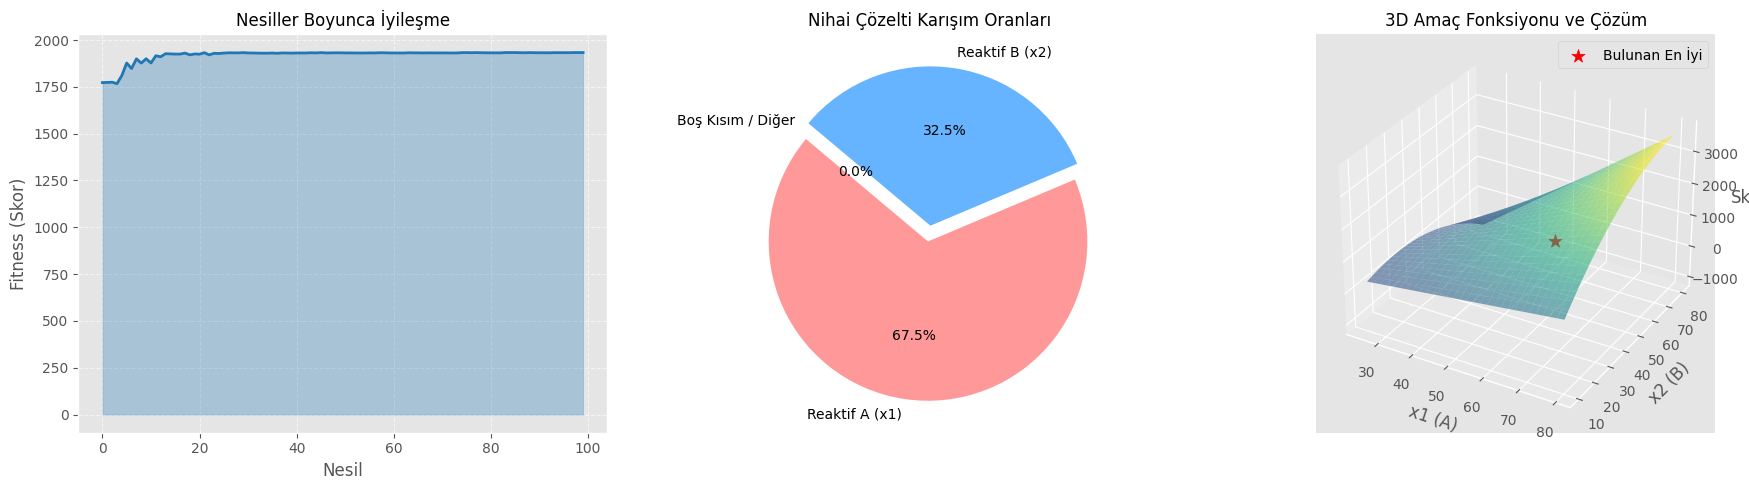

In [23]:
# --- 1. SONUÇ TABLOSU (Pandas DataFrame) ---
sonuc_verisi = {
    "Parametre": ["Reaktif A (x1)", "Reaktif B (x2)", "Toplam Karışım", "Test Hassasiyeti (Skor)"],
    "Değer": [f"%{son_en_iyi[0]:.2f}", f"%{son_en_iyi[1]:.2f}", f"%{son_en_iyi[0]+son_en_iyi[1]:.2f}", f"{fitness_hesapla(son_en_iyi):.4f}"],
    "Durum": ["Uygun", "Uygun", "Kısıt Sağlandı (<=100)", "Maksimize Edildi"]
}
df_sonuc = pd.DataFrame(sonuc_verisi)

print("\n📊 SİMÜLASYON SONUÇ RAPORU")
display(df_sonuc) # Colab'de tabloyu güzel basar

# --- GÖRSELLEŞTİRME PANELİ ---
fig = plt.figure(figsize=(18, 5))

# Grafik 1: Başarım Eğrisi (Sol)
ax1 = fig.add_subplot(1, 3, 1)
ax1.plot(gecmis_en_iyiler, color='#1f77b4', linewidth=2)
ax1.fill_between(range(len(gecmis_en_iyiler)), gecmis_en_iyiler, color='#1f77b4', alpha=0.3)
ax1.set_title('Nesiller Boyunca İyileşme', fontsize=12)
ax1.set_xlabel('Nesil')
ax1.set_ylabel('Fitness (Skor)')
ax1.grid(True, linestyle='--', alpha=0.6)

# Grafik 2: Karışım Oranları Pasta Grafiği (Orta)
ax2 = fig.add_subplot(1, 3, 2)
sizes = [son_en_iyi[0], son_en_iyi[1], 100 - (son_en_iyi[0]+son_en_iyi[1])]
labels = ['Reaktif A (x1)', 'Reaktif B (x2)', 'Boş Kısım / Diğer']
colors = ['#ff9999','#66b3ff','#99ff99']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.05, 0.05, 0))
ax2.set_title('Nihai Çözelti Karışım Oranları', fontsize=12)

# Grafik 3: 3D Çözüm Uzayı ve Bulunan Nokta (Sağ)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

# 3D zemin için veri oluştur
x1_range = np.linspace(25, 80, 30)
x2_range = np.linspace(10, 80, 30)
X1, X2 = np.meshgrid(x1_range, x2_range)
# Fonksiyonumuz: y = 3x1 + 2x2 + x1x2 - 0.5x2^2
Z = 3*X1 + 2*X2 + (X1 * X2) - 0.5 * (X2**2)

# Yüzeyi çiz
surf = ax3.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6, edgecolor='none')
# Bulunan en iyi noktayı işaretle (Kırmızı Yıldız)
z_best = fitness_hesapla(son_en_iyi)
ax3.scatter(son_en_iyi[0], son_en_iyi[1], z_best, color='red', s=100, label='Bulunan En İyi', marker='*')

ax3.set_title('3D Amaç Fonksiyonu ve Çözüm', fontsize=12)
ax3.set_xlabel('x1 (A)')
ax3.set_ylabel('x2 (B)')
ax3.set_zlabel('Skor')
ax3.legend()

plt.tight_layout()
plt.show()